In [621]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
import kagglehub
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [622]:
warnings.filterwarnings('ignore')

In [623]:
path = kagglehub.dataset_download("fedesoriano/cirrhosis-prediction-dataset")

path

'/home/yashkathe/.cache/kagglehub/datasets/fedesoriano/cirrhosis-prediction-dataset/versions/2'

## Data Pre-Processing 

### Read the Data

In [624]:
df = pd.read_csv(f'{path}/{os.listdir(path)[0]}')

df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [625]:
def missing_values(df):
    missing_values = df.iloc[:, 1:].isnull()
    return missing_values.sum()

In [626]:
missing_values(df)

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

### Drop Missing Value with more than Threshold

In [627]:
# let threshold = 80% of data

threshold = 0.80 * len(df)

df = df.dropna(thresh=threshold, axis=1)

In [628]:
# also drop columns with stage missing
df = df.dropna(subset=['Stage'])

In [629]:
df = df.drop('ID', axis=1)

In [630]:
missing_values(df)

Status          0
Age             0
Sex             0
Edema           0
Bilirubin       0
Albumin         0
Platelets      11
Prothrombin     2
Stage           0
dtype: int64

In [631]:
df.describe()

,N_Days,Age,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,401.000000,410.000000,412.000000
mean,1916.837379,18498.286408,3.227670,3.500073,256.102244,10.733415,3.024272
std,1099.941147,3823.705746,4.429421,0.423948,95.750598,1.026557,0.882042
min,41.000000,9598.000000,0.300000,1.960000,62.000000,9.000000,1.000000
25%,1094.250000,15609.250000,0.800000,3.247500,189.000000,10.000000,2.000000
50%,1713.500000,18628.000000,1.400000,3.530000,249.000000,10.600000,3.000000
75%,2610.500000,21200.500000,3.400000,3.782500,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,4.640000,563.000000,18.000000,4.000000


### Replace rest of the missing values

In [632]:
# the std deviation is low and hence can take mean

df['Prothrombin'] = df['Prothrombin'].fillna(df['Prothrombin'].mean())
df['Platelets'] = df['Platelets'].fillna(df['Platelets'].mean)

missing_values(df)

Status         0
Age            0
Sex            0
Edema          0
Bilirubin      0
Albumin        0
Platelets      0
Prothrombin    0
Stage          0
dtype: int64

### Make data numerical

In [633]:
df

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
0,400,D,21464,F,Y,14.5,2.60,190.0,12.2,4.0
1,4500,C,20617,F,N,1.1,4.14,221.0,10.6,3.0
2,1012,D,25594,M,S,1.4,3.48,151.0,12.0,4.0
3,1925,D,19994,F,S,1.8,2.54,183.0,10.3,4.0
4,1504,CL,13918,F,N,3.4,3.53,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...
413,681,D,24472,F,N,1.2,2.96,174.0,10.9,3.0
414,1103,C,14245,F,N,0.9,3.83,180.0,11.2,4.0
415,1055,C,20819,F,N,1.6,3.42,143.0,9.9,3.0
416,691,C,21185,F,N,0.8,3.75,269.0,10.4,3.0


In [634]:
df['Status'].unique(), df['Sex'].unique(), df['Edema'].unique()

(array(['D', 'C', 'CL'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Y', 'N', 'S'], dtype=object))

In [635]:
df['Status'] = df['Status'].map({'D': 0, 'C': 1, 'CL': 2})
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['Edema'] = df['Edema'].map({'Y':0, 'N': 1, 'S': 0})

df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,0.679612,18498.286408,0.106796,0.844660,3.227670,3.500073,10.733415,3.024272
std,1099.941147,0.583030,3823.705746,0.309229,0.362669,4.429421,0.423948,1.024056,0.882042
min,41.000000,0.000000,9598.000000,0.000000,0.000000,0.300000,1.960000,9.000000,1.000000
25%,1094.250000,0.000000,15609.250000,0.000000,1.000000,0.800000,3.247500,10.000000,2.000000
50%,1713.500000,1.000000,18628.000000,0.000000,1.000000,1.400000,3.530000,10.600000,3.000000
75%,2610.500000,1.000000,21200.500000,0.000000,1.000000,3.400000,3.782500,11.100000,4.000000
max,4795.000000,2.000000,28650.000000,1.000000,1.000000,28.000000,4.640000,18.000000,4.000000


In [636]:
df.dtypes

N_Days           int64
Status           int64
Age              int64
Sex              int64
Edema            int64
Bilirubin      float64
Albumin        float64
Platelets       object
Prothrombin    float64
Stage          float64
dtype: object

In [637]:
df['Platelets'] = pd.to_numeric(df['Platelets'], errors='coerce')

In [638]:
missing_values(df)

Status          0
Age             0
Sex             0
Edema           0
Bilirubin       0
Albumin         0
Platelets      11
Prothrombin     0
Stage           0
dtype: int64

In [639]:
df['Platelets'] = df['Platelets'].fillna(df['Platelets'].median())

In [640]:
df.columns

Index(['N_Days', 'Status', 'Age', 'Sex', 'Edema', 'Bilirubin', 'Albumin',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [641]:
df.dtypes

N_Days           int64
Status           int64
Age              int64
Sex              int64
Edema            int64
Bilirubin      float64
Albumin        float64
Platelets      float64
Prothrombin    float64
Stage          float64
dtype: object

In [642]:
def plot_boxplots_in_subplots(df, cols_per_row=2, figsize=(10, 5)):
    
    n_cols = len(df.columns)
    n_rows = int(np.ceil(n_cols / cols_per_row)) 
    
    # Create subplots: n_rows rows, cols_per_row columns
    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=figsize)
    
    # Flatten the axes array
    axes = axes.flatten()
    
    # Loop through the columns and plot each one in a separate subplot
    for i, cname in enumerate(df.columns):
        sns.boxplot(x=df[cname], ax=axes[i])  # Plot in the ith subplot
        axes[i].set_title(f'Box plot for {cname}')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [643]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,0.679612,18498.286408,0.106796,0.844660,3.227670,3.500073,255.912621,10.733415,3.024272
std,1099.941147,0.583030,3823.705746,0.309229,0.362669,4.429421,0.423948,94.467529,1.024056,0.882042
min,41.000000,0.000000,9598.000000,0.000000,0.000000,0.300000,1.960000,62.000000,9.000000,1.000000
25%,1094.250000,0.000000,15609.250000,0.000000,1.000000,0.800000,3.247500,190.000000,10.000000,2.000000
50%,1713.500000,1.000000,18628.000000,0.000000,1.000000,1.400000,3.530000,249.000000,10.600000,3.000000
75%,2610.500000,1.000000,21200.500000,0.000000,1.000000,3.400000,3.782500,314.500000,11.100000,4.000000
max,4795.000000,2.000000,28650.000000,1.000000,1.000000,28.000000,4.640000,563.000000,18.000000,4.000000


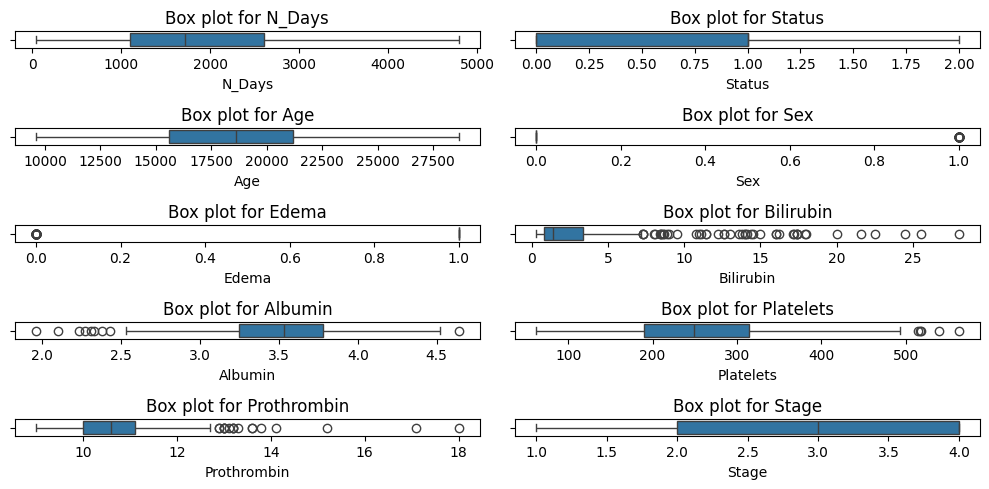

In [644]:
plot_boxplots_in_subplots(df)

In [645]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,0.679612,18498.286408,0.106796,0.844660,3.227670,3.500073,255.912621,10.733415,3.024272
std,1099.941147,0.583030,3823.705746,0.309229,0.362669,4.429421,0.423948,94.467529,1.024056,0.882042
min,41.000000,0.000000,9598.000000,0.000000,0.000000,0.300000,1.960000,62.000000,9.000000,1.000000
25%,1094.250000,0.000000,15609.250000,0.000000,1.000000,0.800000,3.247500,190.000000,10.000000,2.000000
50%,1713.500000,1.000000,18628.000000,0.000000,1.000000,1.400000,3.530000,249.000000,10.600000,3.000000
75%,2610.500000,1.000000,21200.500000,0.000000,1.000000,3.400000,3.782500,314.500000,11.100000,4.000000
max,4795.000000,2.000000,28650.000000,1.000000,1.000000,28.000000,4.640000,563.000000,18.000000,4.000000


### Handle Outliers

In [646]:
def handle_outliers(df, iqr_multiplier=1.5):

    for col in df.select_dtypes(include=[np.number]).columns:  # Only process numeric columns
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR


        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [647]:
df = handle_outliers(df)

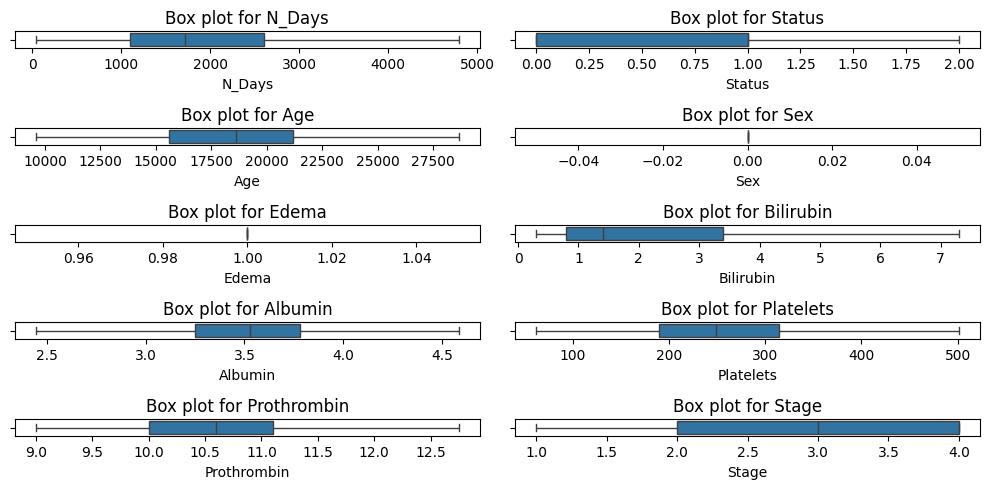

In [648]:
plot_boxplots_in_subplots(df)

In [649]:
def plot_distributions_in_subplots(df, cols_per_row=2, figsize=(20, 10), kde=True):

    n_cols = len(df.columns)
    n_rows = int(np.ceil(n_cols / cols_per_row))  # Calculate number of rows

    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=figsize)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through the columns and plot each one in a separate subplot
    for i, cname in enumerate(df.columns):
        sns.histplot(df[cname], kde=kde, ax=axes[i], color='blue', bins=20)  # Histogram with KDE
        axes[i].set_title(f'Distribution of {cname}')

    # Remove empty subplots if any
    for j in range(n_cols, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

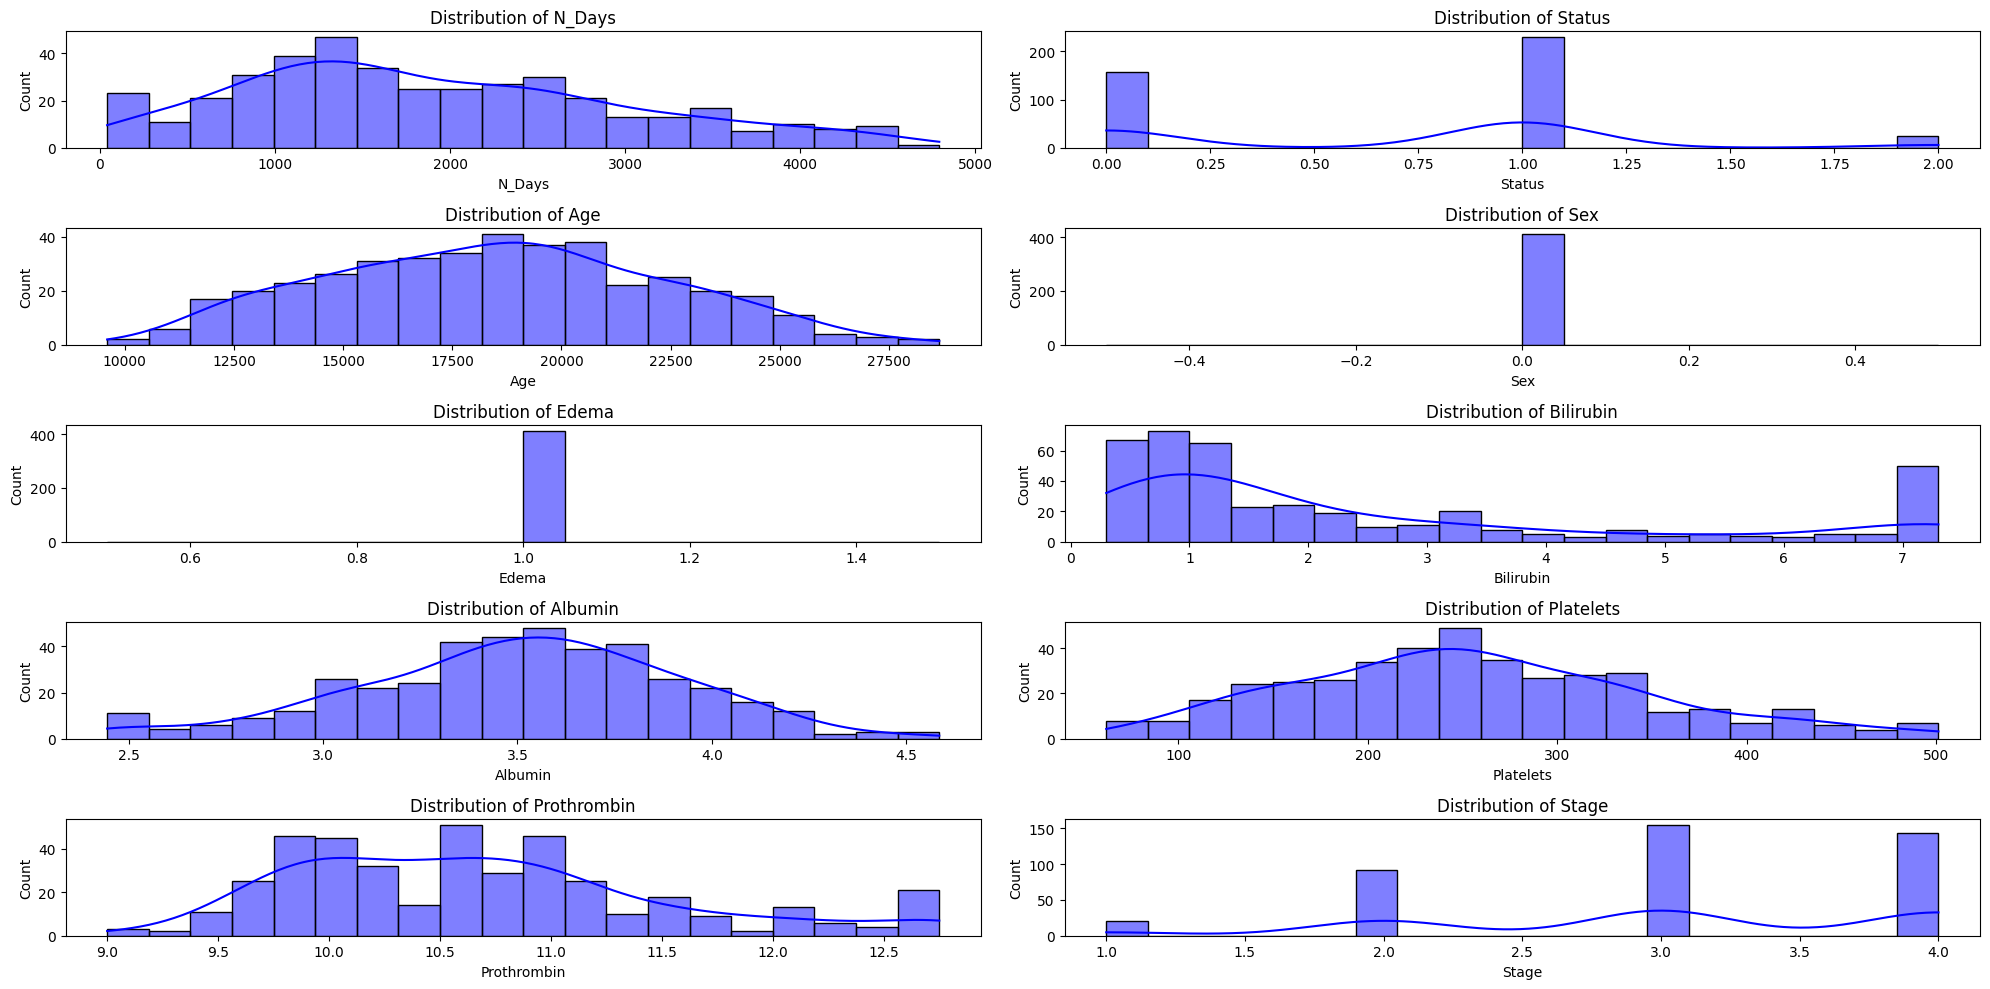

In [650]:
plot_distributions_in_subplots(df)

In [651]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.0,412.0,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,0.679612,18498.286408,0.0,1.0,2.488592,3.503701,255.561286,10.685599,3.024272
std,1099.941147,0.583030,3823.705746,0.0,0.0,2.294273,0.412706,93.470600,0.843512,0.882042
min,41.000000,0.000000,9598.000000,0.0,1.0,0.300000,2.445000,62.000000,9.000000,1.000000
25%,1094.250000,0.000000,15609.250000,0.0,1.0,0.800000,3.247500,190.000000,10.000000,2.000000
50%,1713.500000,1.000000,18628.000000,0.0,1.0,1.400000,3.530000,249.000000,10.600000,3.000000
75%,2610.500000,1.000000,21200.500000,0.0,1.0,3.400000,3.782500,314.500000,11.100000,4.000000
max,4795.000000,2.000000,28650.000000,0.0,1.0,7.300000,4.585000,501.250000,12.750000,4.000000


### Normalize the data

In [652]:
def standardize_columns(df, columns_to_include):
    
    df_copy = df.copy() 
    
    for col in columns_to_include:
        if col in df_copy.columns:
            df_copy[col] = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    
    return df_copy

In [653]:
df = standardize_columns(df, ['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Platelets', 'Prothrombin'])

In [654]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,4.120000e+02,412.000000,4.120000e+02,412.0,412.0,4.120000e+02,4.120000e+02,4.120000e+02,4.120000e+02,412.000000
mean,3.449237e-17,0.679612,-2.026426e-16,0.0,1.0,5.173855e-17,-5.863702e-16,-9.485401e-17,8.278168e-16,3.024272
std,1.000000e+00,0.583030,1.000000e+00,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.882042
min,-1.705398e+00,0.000000,-2.327660e+00,0.0,1.0,-9.539371e-01,-2.565266e+00,-2.070825e+00,-1.998310e+00,1.000000
25%,-7.478467e-01,0.000000,-7.555593e-01,0.0,1.0,-7.360031e-01,-6.207840e-01,-7.014108e-01,-8.127909e-01,2.000000
50%,-1.848621e-01,1.000000,3.392353e-02,0.0,1.0,-4.744824e-01,6.372218e-02,-7.019626e-02,-1.014794e-01,3.000000
75%,6.306361e-01,1.000000,7.067002e-01,0.0,1.0,3.972534e-01,6.755374e-01,6.305588e-01,4.912803e-01,4.000000
max,2.616651e+00,2.000000,2.654941e+00,0.0,1.0,2.097138e+00,2.620020e+00,2.628513e+00,2.447387e+00,4.000000


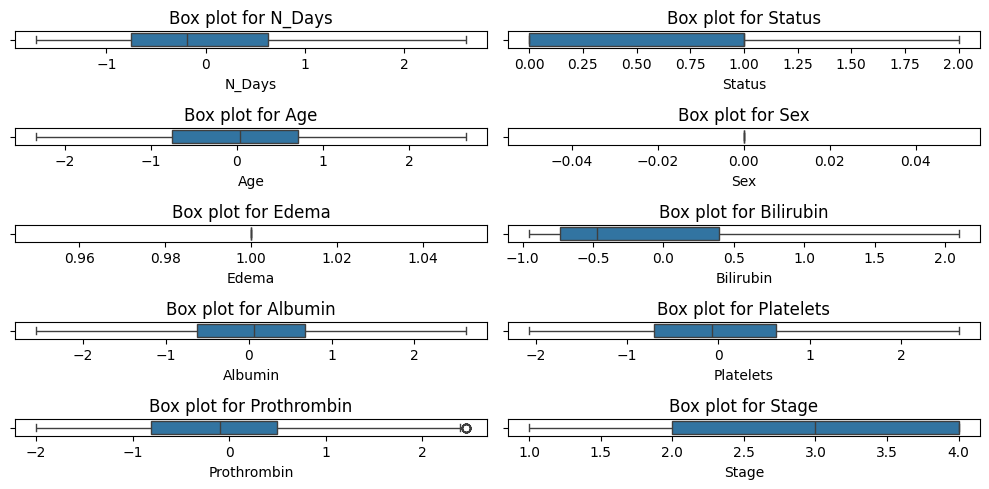

In [655]:
plot_boxplots_in_subplots(df)

### OverSampling

In [656]:
smote = SMOTE()

X = df.drop('Stage', axis=1)
y = df['Stage']

In [657]:
# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [658]:
# Convert back to DataFrame
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Stage')], axis=1)

In [659]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,620.000000,620.000000,620.000000,620.0,620.0,620.000000,620.000000,620.000000,620.000000,620.000000
mean,0.146029,0.739077,-0.070463,0.0,1.0,-0.148128,0.104014,0.099027,-0.095879,2.500000
std,0.996556,0.523547,0.942721,0.0,0.0,0.933001,0.940048,0.944580,0.945327,1.118937
min,-1.705398,0.000000,-2.327660,0.0,1.0,-0.953937,-2.565266,-2.070825,-1.998310,1.000000
25%,-0.613454,0.000000,-0.761444,0.0,1.0,-0.779590,-0.396654,-0.498138,-0.812791,1.750000
50%,0.043560,1.000000,-0.040219,0.0,1.0,-0.594365,0.184874,0.036789,-0.220031,2.500000
75%,0.802811,1.000000,0.555719,0.0,1.0,0.092804,0.767138,0.668004,0.372728,3.250000
max,2.616651,2.000000,2.654941,0.0,1.0,2.097138,2.620020,2.628513,2.447387,4.000000


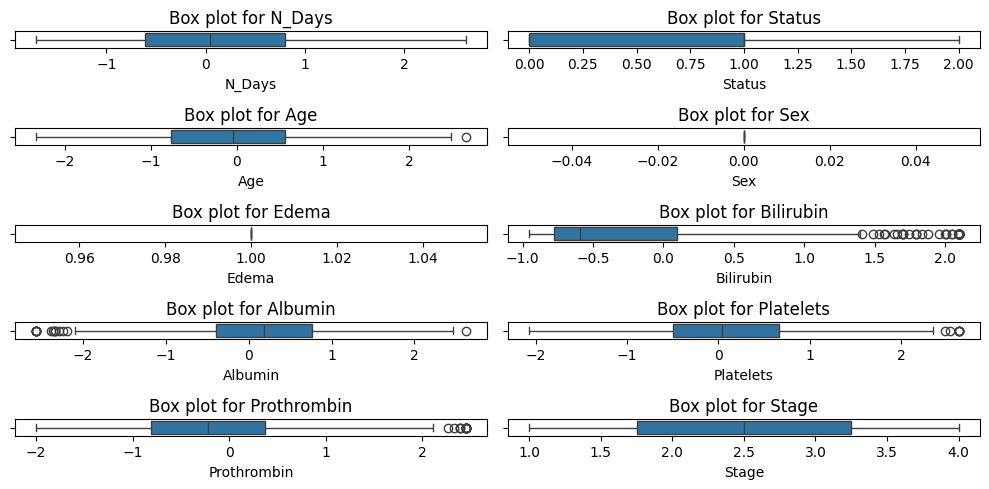

In [660]:
plot_boxplots_in_subplots(df)

## Normalize and Handle Outliers again

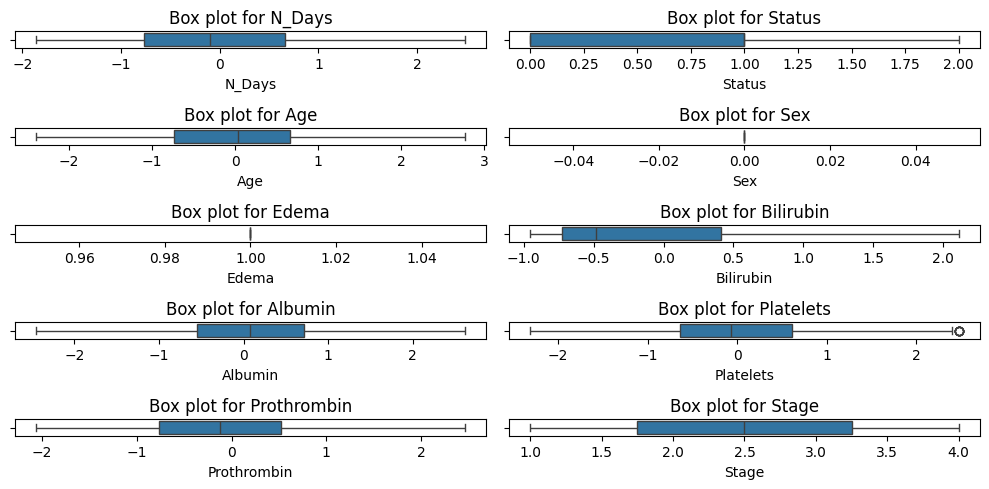

In [661]:
df = handle_outliers(df)
df = standardize_columns(df, ['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Platelets', 'Prothrombin'])

plot_boxplots_in_subplots(df)

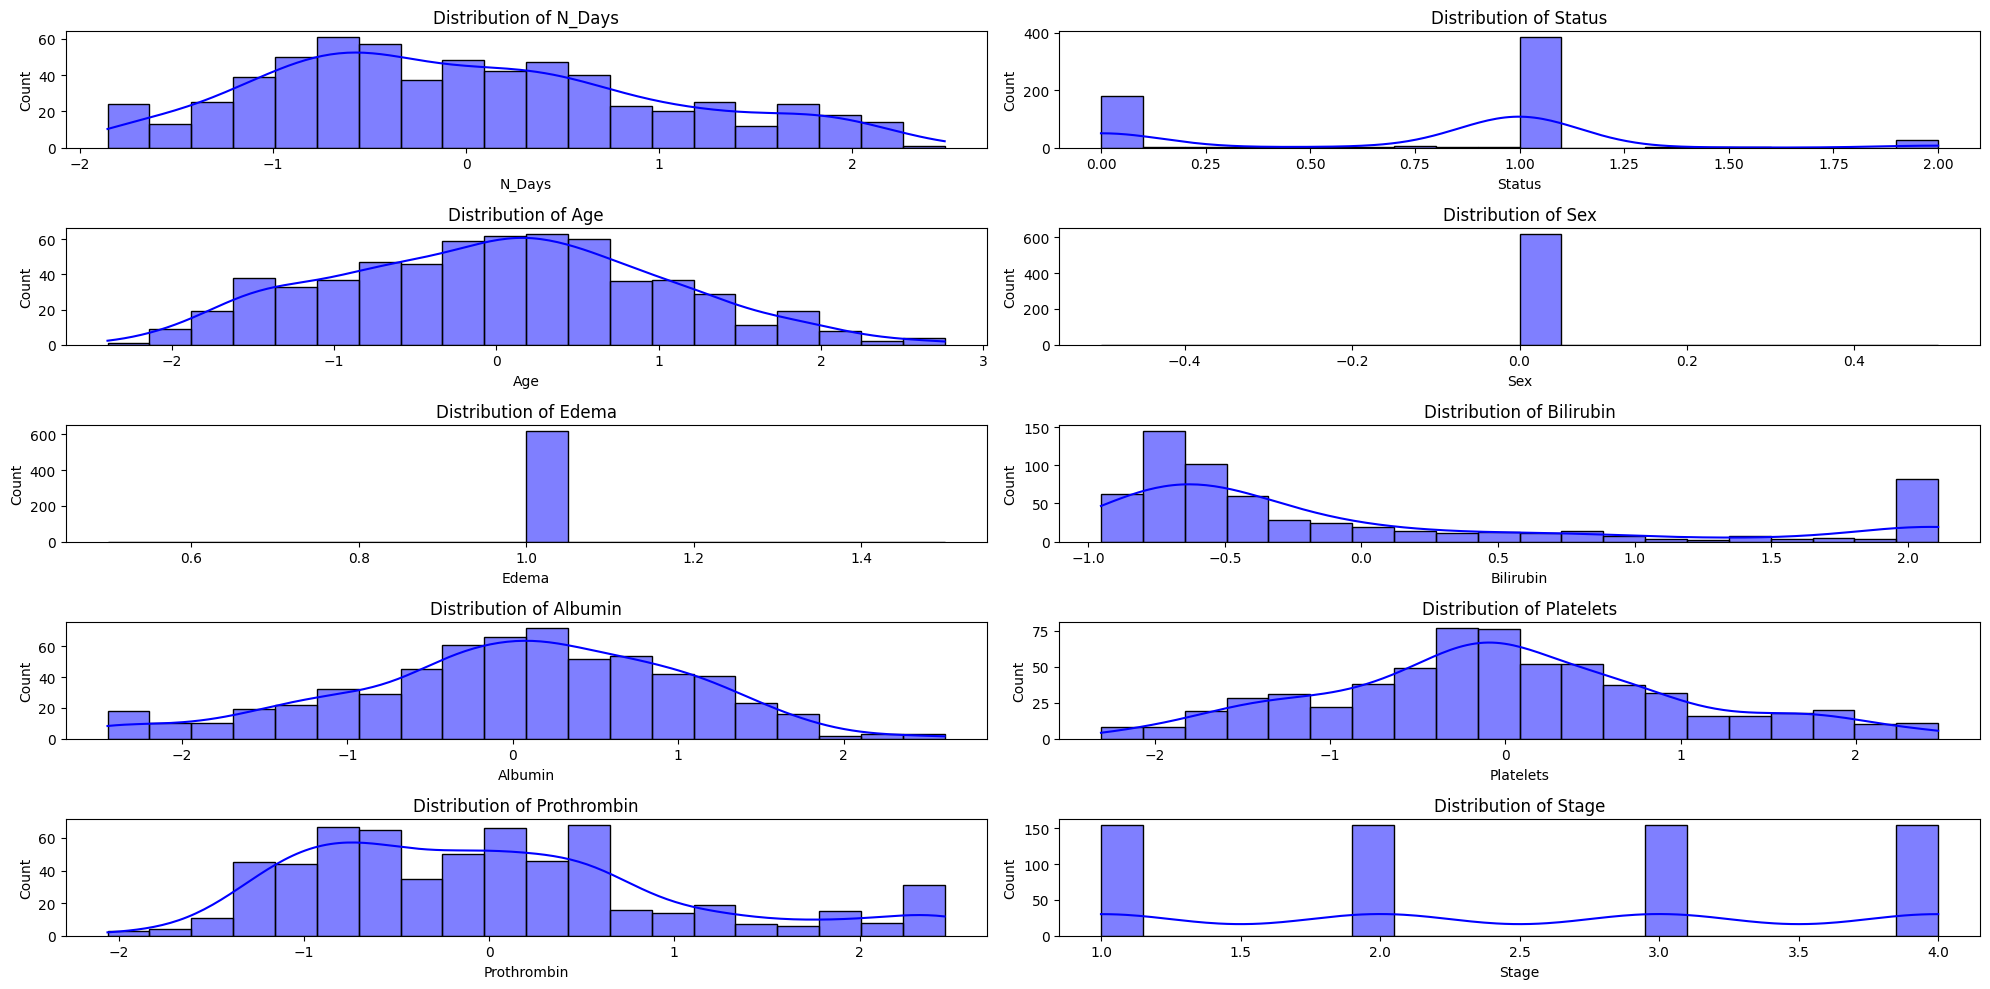

In [662]:
plot_distributions_in_subplots(df)

### Split Data

In [663]:
X = df.drop(columns=['Stage'])
y = df['Stage']

In [664]:
X.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin
count,6.200000e+02,620.000000,6.200000e+02,620.0,620.0,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02
mean,2.292073e-17,0.739077,-2.578583e-17,0.0,1.0,-4.584147e-17,4.297638e-17,-1.719055e-17,-5.730183e-18
std,1.000000e+00,0.523547,1.000000e+00,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.857826e+00,0.000000,-2.395565e+00,0.0,1.0,-9.532628e-01,-2.450665e+00,-2.307585e+00,-2.061228e+00
25%,-7.621087e-01,0.000000,-7.331913e-01,0.0,1.0,-7.264703e-01,-5.524937e-01,-6.335300e-01,-7.694833e-01
50%,-1.028231e-01,1.000000,3.231239e-02,0.0,1.0,-4.855284e-01,7.982964e-02,-6.412351e-02,-1.236110e-01
75%,6.590514e-01,1.000000,6.648377e-01,0.0,1.0,4.083483e-01,7.129541e-01,6.077761e-01,5.222612e-01
max,2.479161e+00,2.000000,2.761881e+00,0.0,1.0,2.110576e+00,2.611126e+00,2.469735e+00,2.459878e+00


In [665]:
y.describe()

count    620.000000
mean       2.500000
std        1.118937
min        1.000000
25%        1.750000
50%        2.500000
75%        3.250000
max        4.000000
Name: Stage, dtype: float64

In [666]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Implementation of Neural Network from Scratch

###  1 Initialize Neural Network Architecture

In [667]:
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
hidden_size = 8

input_size, output_size

(9, 4)

In [668]:
input_to_hidden_w = np.random.randn(input_size, hidden_size) * 0.01
input_to_hidden_bias = np.zeros((1, hidden_size))

input_to_hidden_w.shape, input_to_hidden_bias.shape

((9, 8), (1, 8))

In [669]:
hidden_to_output_w = np.random.randn(hidden_size, output_size) * 0.01
hidden_to_output_bias = np.zeros((1, output_size))

hidden_to_output_w.shape, hidden_to_output_bias.shape

((8, 4), (1, 4))

### 2. Forward Propagation

In [670]:
# softmax function - used for multiclass classification
def softmax(Z):
    exp_vals = np.exp(Z)
    probablities = exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
    return probablities

In [671]:
def forward_propogation(X, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output):
    
    # input to hidden layer
    Z_hidden = np.dot(X, weights_input_hidden) + bias_input_hidden
    activation_hidden = np.maximum(0, Z_hidden)

    # hidden to output layer
    Z_output = np.dot(activation_hidden, weights_hidden_output) + bias_hidden_output
    A_output = softmax(Z_output)

    return Z_hidden, activation_hidden, Z_output, A_output

In [672]:
# cross entropy loss
def calculate_loss(y_true, y_pred):

    # to avoid log(0) errors
    epsilon = 1e-15 
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

    return loss

## 3. Backpropagation

### Compute Gradients

In [673]:
def backpropogation(X, y, activation_hidden, activation_output, weights_hidden_output, Z_hidden):
    
    # output layer error
    delta_output = activation_output - y

    # gradients for output layer
    grad_W_hidden_output = np.dot(activation_hidden.T, delta_output) # (n_hidden, n_classes)
    grad_B_hidden_output = np.sum(delta_output, axis=0, keepdims=True)  # (1, n_classes)

    # backpropogate to hidden layer
    delta_hidden = np.dot(delta_output, weights_hidden_output.T) * (Z_hidden > 0)  # ReLU derivative

    # gradients for hidden layer
    grad_W_input_hidden = np.dot(X.T, delta_hidden)  # (n_features, n_hidden)
    grad_B_input_hidden = np.sum(delta_hidden, axis=0, keepdims=True)  # (1, n_hidden)
    
    gradients = {
        "grad_W_hidden_output": grad_W_hidden_output,
        "grad_B_hidden_output": grad_B_hidden_output,
        "grad_W_input_hidden": grad_W_input_hidden,
        "grad_B_input_hidden": grad_B_input_hidden
    }

    return gradients

### Update Parameters

In [674]:
def update_parameters(weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output, gradients, learning_rate):

  # Update weights and biases for the hidden layer
  weights_input_hidden -= learning_rate * gradients["grad_W_input_hidden"]
  bias_input_hidden -= learning_rate * gradients["grad_B_input_hidden"]
  
  # Update weights and biases for the output layer
  weights_hidden_output -= learning_rate * gradients["grad_W_hidden_output"]
  bias_hidden_output -= learning_rate * gradients["grad_B_hidden_output"]
  
  return weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output

## 4. Training Loop

In [675]:
# convert data
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [676]:
# apply one hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = np.eye(num_classes)[y_train - 1]
y_test_one_hot = np.eye(num_classes)[y_test - 1]

In [677]:
# calcualte accuracy
def accuracy_score(y_true, y_pred):

    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    return np.mean(y_true_labels == y_pred_labels)

In [678]:
# hyperparameters
epochs = 5000
batch_size = 32
learning_rate = 0.0003

In [679]:
# get the number of samples
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [680]:
# store results for plotting
results = {
    "train_loss": [],
    "test_loss": [],
    "train_acc": [],
    "test_acc": [],
    "epoch":[]
}

In [681]:
# training loop
for epoch in range(1, epochs + 1):
    
    # Shuffle training data
    shuffle_indices = np.random.permutation(n_train)
    X_train_shuffled = X_train[shuffle_indices]
    y_train_shuffled = y_train_one_hot[shuffle_indices]

    # Mini-batch training
    for i in range(0, n_train, batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Forward pass using the forward_propogation function
        Z_hidden, activation_hidden, Z_output, activation_output = forward_propogation(
            X_batch,
            input_to_hidden_w, input_to_hidden_bias,
            hidden_to_output_w, hidden_to_output_bias
        )

        # Compute loss
        loss = calculate_loss(y_batch, activation_output)

        # Backpropogation
        gradients = backpropogation(
            X_batch, y_batch, 
            activation_hidden, activation_output,
            hidden_to_output_w, Z_hidden
        )

        # Update parameters
        (input_to_hidden_w, input_to_hidden_bias, hidden_to_output_w, hidden_to_output_bias) = update_parameters(
             input_to_hidden_w, input_to_hidden_bias,
             hidden_to_output_w, hidden_to_output_bias,
             gradients, learning_rate
        )

    # Evaluate Training Set
    _, activation_hidden_train, _, activation_output_train = forward_propogation(
        X_train,
        input_to_hidden_w, input_to_hidden_bias,
        hidden_to_output_w, hidden_to_output_bias
    )

    train_loss = calculate_loss(y_train_one_hot, activation_output_train)
    train_acc = accuracy_score(y_train_one_hot, activation_output_train)

    # Evaluate Test Set
    _, activation_hidden_test, _, activation_output_test = forward_propogation(
        X_test,
        input_to_hidden_w, input_to_hidden_bias,
        hidden_to_output_w, hidden_to_output_bias
    )

    test_loss = calculate_loss(y_test_one_hot, activation_output_test)
    test_acc = accuracy_score(y_test_one_hot, activation_output_test)

    # Store results every 100 epochs (or every epoch if desired)
    if epoch % 100 == 0:
        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)
        results["epoch"].append(epoch)

        print(f"Epoch: {epoch}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

Epoch: 100/5000, Train Loss: 1.2421, Train Acc: 0.4294, Test Loss: 1.2549, Test Acc: 0.4113
Epoch: 200/5000, Train Loss: 1.1802, Train Acc: 0.4496, Test Loss: 1.2087, Test Acc: 0.4435
Epoch: 300/5000, Train Loss: 1.1667, Train Acc: 0.4516, Test Loss: 1.2041, Test Acc: 0.4355
Epoch: 400/5000, Train Loss: 1.1468, Train Acc: 0.4677, Test Loss: 1.2005, Test Acc: 0.4274
Epoch: 500/5000, Train Loss: 1.1251, Train Acc: 0.4879, Test Loss: 1.1967, Test Acc: 0.4435
Epoch: 600/5000, Train Loss: 1.1079, Train Acc: 0.5141, Test Loss: 1.1941, Test Acc: 0.5000
Epoch: 700/5000, Train Loss: 1.0911, Train Acc: 0.5161, Test Loss: 1.1912, Test Acc: 0.4839
Epoch: 800/5000, Train Loss: 1.0814, Train Acc: 0.5282, Test Loss: 1.1891, Test Acc: 0.4758
Epoch: 900/5000, Train Loss: 1.0735, Train Acc: 0.5383, Test Loss: 1.1872, Test Acc: 0.4758
Epoch: 1000/5000, Train Loss: 1.0659, Train Acc: 0.5343, Test Loss: 1.1841, Test Acc: 0.4839
Epoch: 1100/5000, Train Loss: 1.0601, Train Acc: 0.5423, Test Loss: 1.1812, Tes

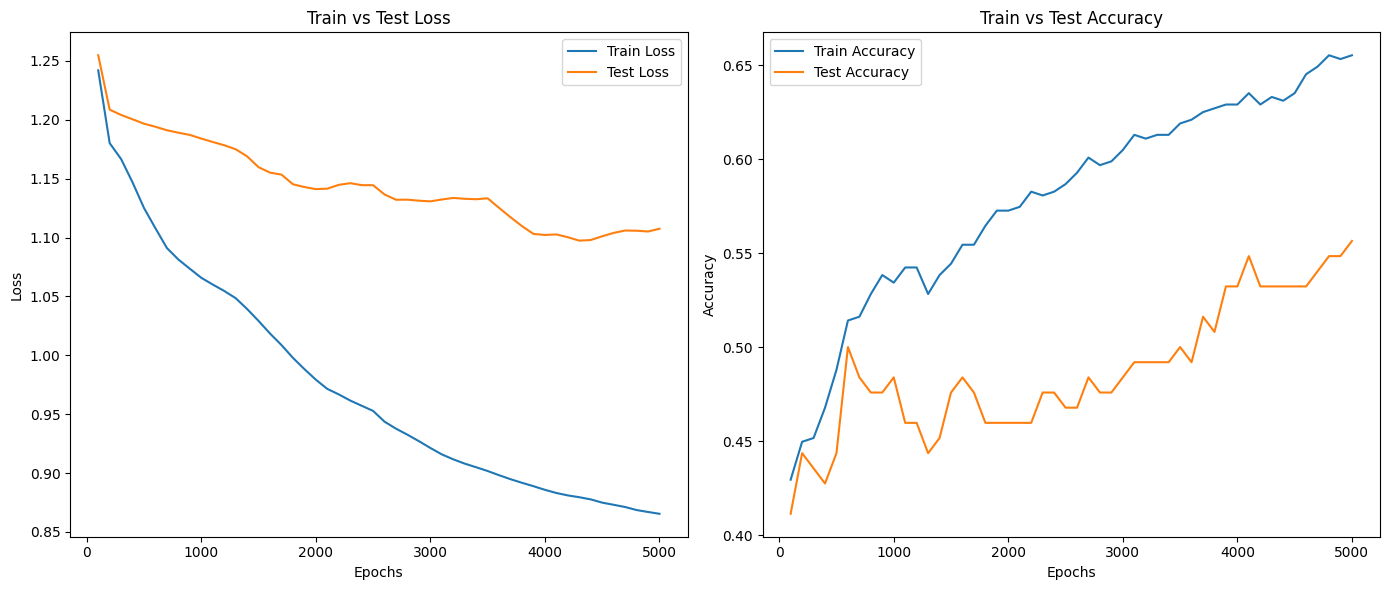

In [682]:
plt.figure(figsize=(14, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(results["epoch"], results["train_loss"], label='Train Loss')
plt.plot(results["epoch"], results["test_loss"], label='Test Loss')
plt.title("Train vs Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(results["epoch"], results["train_acc"], label='Train Accuracy')
plt.plot(results["epoch"], results["test_acc"], label='Test Accuracy')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()